The Goal of this notebook is simply to ensure that environment is setup correctly.

**Resources**

* [MNIST (Medium Article)](https://towardsdatascience.com/handwritten-digit-mnist-pytorch-977b5338e627)
* [Official Pytorch MNIST](https://github.com/pytorch/examples/tree/master/mnist)

In [1]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim
import torch.nn.functional as F

In [2]:
BATCH_SIZE=16
LEARNING_RATE = 1e-3

transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)) # need to check why this is done. 
    ])
dataset1 = datasets.MNIST('../data', train=True, download=True,
                    transform=transform)
dataset2 = datasets.MNIST('../data', train=False,
                    transform=transform)
train_loader = torch.utils.data.DataLoader(dataset1, shuffle=False, batch_size=BATCH_SIZE)
test_loader = torch.utils.data.DataLoader(dataset2, shuffle=False, batch_size=BATCH_SIZE)


  0%|          | 16384/9912422 [00:00<01:17, 127250.04it/s]

9920512it [00:00, 16135636.35it/s]                           


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw


32768it [00:00, 434915.50it/s]
0it [00:00, ?it/s]

Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw


1654784it [00:00, 7077200.50it/s]                            
8192it [00:00, 86568.96it/s]


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw
Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw
Processing...
Done!


**Show Some Data**

In [3]:
import matplotlib.pyplot as plt
import numpy as np

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


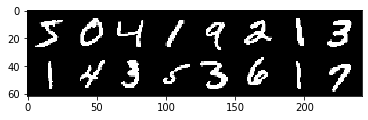

In [4]:
def imshow(img):
    #img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

## get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

## show images
imshow(torchvision.utils.make_grid(images))

In [5]:
for images, labels in train_loader:
    print("Image batch dimensions:", images.shape)
    print("Image label dimensions:", labels.shape)
    break

Image batch dimensions: torch.Size([16, 1, 28, 28])
Image label dimensions: torch.Size([16])


### Construct the model

In [6]:
class DigitClassifier(nn.Module):
    def __init__(self, input_dims, hidden_sizes):
        super(DigitClassifier, self).__init__()
        input_size = np.prod(input_dims)

        self.fc1 = nn.Linear(input_size, hidden_sizes[0])
        self.fc2 = nn.Linear(hidden_sizes[0], hidden_sizes[1])
        self.fc3 = nn.Linear(hidden_sizes[1], 10) 
  
    def forward(self, x):
    
        x = torch.flatten(x,1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        return F.log_softmax(x, dim=1) 


In [7]:
dc = DigitClassifier((28,28), [1096,2048])

In [8]:
optimizer = optim.Adam(dc.parameters(), lr=1e-3)
criterion = nn.NLLLoss()

### Training Loop

In [42]:
### Todo write me. 

# loss fun . SGD
# optimizer. Adam

#### training loop
# set train() to true
# loop over the dataloader batches
# zero the gradients
# forward pass
# get loss
# backward pass
# step
# print out results

#### validation loop
# set train() to false
# loop over the dataloader batches
# reset hidden state after reach loop
# forward pass
# get loss
# print results

# put training and validation loops inside of epochs loop.

def train_epoch(model, optimizer, criterion, dataloader, epoch):
    
    loss_items = []
    bi = 0
    
    model.train()

    for images, labels in dataloader:
        bi = bi + 1

        model.zero_grad()
        log_probs = model(images) 

        loss = criterion(log_probs, labels)
        loss_items.append(loss)

        loss.backward()
        optimizer.step()

        #print some results.               
        print('| epoch {:3d} | {:3d} batch | lr {:02.2f} | loss {:5.2f}'.format(
            epoch,
            bi,
            LEARNING_RATE,
            loss.item()
        ))
      
def valid_epoch(model, criterion, dataloader, epoch):

    loss_items = []
    bi = 0

    model.eval()
    
    for images, labels in dataloader:
        bi = bi + 1
        
        with torch.no_grad():
            logps = model(images)

        loss = criterion(logps, labels)
        loss_items.append(loss)
        
        probs = torch.exp(logps)
        predicted = torch.argmax(probs, dim=1)
        
        match_count = labels.eq(predicted).sum().item()
        accuracy = match_count / BATCH_SIZE
         

        #print some results.               
        print('| epoch {:3d} | {:3d} batch | lr {:02.2f} | loss {:5.2f}, acc {:5.2f}'.format(
            epoch,
            bi,
            LEARNING_RATE,
            loss.item(),
            accuracy
        ))

    



### Testing 


In [15]:
images.shape

torch.Size([16, 1, 28, 28])

In [16]:
out = dc(images)

In [17]:
out.shape

torch.Size([16, 10])

In [18]:
torch.exp(out) #translate to probabilities. 

tensor([[0.1113, 0.1100, 0.0830, 0.1010, 0.1068, 0.0933, 0.0897, 0.1031, 0.1040,
         0.0978],
        [0.0961, 0.1090, 0.0877, 0.0979, 0.1128, 0.0942, 0.0893, 0.1102, 0.1050,
         0.0977],
        [0.1155, 0.1176, 0.0736, 0.0846, 0.1169, 0.0894, 0.0877, 0.1093, 0.1043,
         0.1009],
        [0.1104, 0.1170, 0.0932, 0.0956, 0.1120, 0.0855, 0.0926, 0.1005, 0.0980,
         0.0952],
        [0.1129, 0.1024, 0.0814, 0.0867, 0.1166, 0.0917, 0.0996, 0.1114, 0.1072,
         0.0901],
        [0.1077, 0.1220, 0.0794, 0.0897, 0.1174, 0.0868, 0.0890, 0.1187, 0.0941,
         0.0952],
        [0.1021, 0.1089, 0.0791, 0.0907, 0.1117, 0.0941, 0.0976, 0.1118, 0.1054,
         0.0985],
        [0.1118, 0.1199, 0.0800, 0.0825, 0.1194, 0.0962, 0.0811, 0.1048, 0.1046,
         0.0996],
        [0.0965, 0.1047, 0.0868, 0.0949, 0.1136, 0.0929, 0.1005, 0.1093, 0.1037,
         0.0971],
        [0.1117, 0.1101, 0.0792, 0.0923, 0.1102, 0.0976, 0.0986, 0.1062, 0.0968,
         0.0972],
        [0

In [19]:
probs = torch.exp(out) #translate to probabilities. 

In [20]:
torch.argmax(probs, dim=1)

tensor([0, 4, 1, 1, 4, 1, 7, 1, 4, 0, 4, 1, 4, 4, 4, 7])

In [22]:
images, labels = next(iter(train_loader))

In [23]:
labels

tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7])

In [24]:
lc = labels.detach().clone()

In [25]:
lc[1] = 5

In [26]:
lc


tensor([5, 5, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7])

In [27]:
lc.eq(labels)

tensor([ True, False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True])

In [28]:
(lc == labels).sum(1)

IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)

In [31]:
(lc == labels).sum()

tensor(15)

In [40]:
lc.eq(labels).sum().item()

15

In [41]:
lc.eq(labels).sum().item()/16


0.9375